# Data Science Methods for Clean Energy Research 
## *Introduction to <font color=blue>Data Visualization</font>*

In this notebook we will look at functions which enable us to plot data using python. Three libraries will be considered, <code>pandas</code>, <code>matplotlib</code> and <code>seaborn</code>. 

## Outline 

### 1. Use <code> matplotlib </code> to visualize data in lists or numpy arrays
#### 1.1 Plots of 2D data
* line plots
* scatter plot
* histograms
* colors, markers, linetypes, markertypes 
* legends, titles and axis labels

#### 1.2 More than one 2D plot

#### 1.2 Plots of 3D data

###  2. Use <code>pandas</code> to visualize data in pandas dataframes

* line plots
* scatter plots
* histograms

###  3. Use <code>seaborn</code> to visualize data in pandas dataframes

* kernel density estimate plots
* pairplots

---

### Load libraries


Import libraries for visualization and data operations. It is always good practice to do this at the beginning of a notebook. If you don't have seaborn, you can install it with conda install seaborn.

In [1]:
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

import random
import numpy as np

Use the most current version of matplotlib and seaborn, if you have an old version run the following commands from terminal

<code>pip install -U matplotlib</code>

<code>pip install -U seaborn</code>


Use notebook magic to render matplotlib figures inline with notebook cells.

In [2]:
%matplotlib inline

## 1. Matplotlib

### 1.1 Plot data in 2D

You are given data which indicates Dr V's position in her 20x20 foot office when she is searching for the coffee machine. She forgot to write her numbers to a file so we generate them hereafter using <code> numpy </code> and <code> random </code>:

In [3]:
# Very important data - points which indicates the position of Dr V on the best path connecting Dr V to the coffee machine
length = 20   # Size of room in feet
m = 1         # Slope of shortest path
b = 0         # Intercept of shortest path
x1 = np.linspace(0,length,10)  # Position along x
y1 = m*x1 + b                  # Position along y

In [4]:
# Other possible Dr V positions in the room
random.seed(19)
x2 = np.linspace(0,20,5000)
y2_rand = [ random.random()*20 for i in range(5000) ]

print(type(x1), type(y1))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


#### 1.1 A line plot

Now we use the <code>plot()</code> function from <code>pyplot</code> in <code>matplotlib</code> to plot the data. This command generates a figure but not axes object.

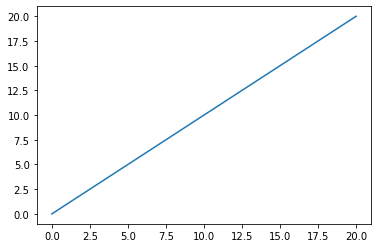

In [5]:
# What does the important data look like?
plt.figure()
plt.plot(x1, y1)

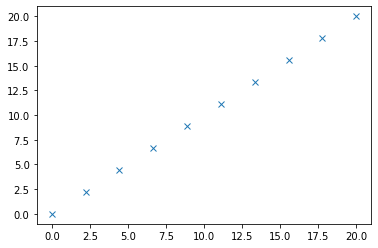

In [6]:
# What do the points look like?
plt.figure()
plt.plot(x1, y1, linestyle=' ', marker='x')

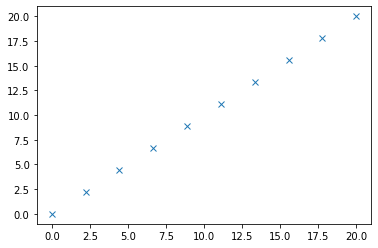

In [7]:
# Define marker and linestyle contemporarily
plt.figure()
plt.plot(x1, y1, 'x') 

In the above plots we are not defining axes and a figure separately, if desired this can be done as following. The axes define the area over which to plot data. For more information on creating figures see [here](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py).

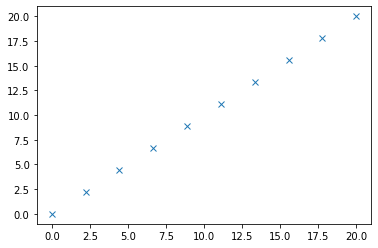

In [8]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(x1, y1, linestyle=' ', marker='x')  # Plot some data on the axes.
plt.show()

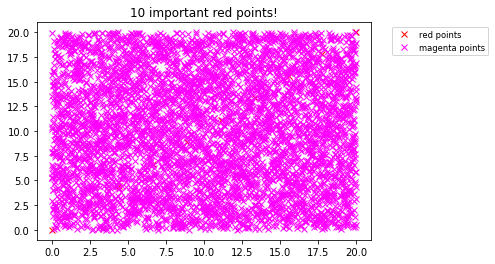

In [9]:
plt.figure()
plt.title("10 important red points!")
plt.plot(x1, y1,'xr', label='red points')
plt.plot(x2, y2_rand,'x', color='magenta', label='magenta points')
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.show()

Time to fix the plots - need to change the **colors**, **markers**, **linestyle**, **fontsize** and **add labels!**

* Info on markers - https://matplotlib.org/3.3.3/api/markers_api.html
* Info on colors - https://matplotlib.org/3.1.0/gallery/color/named_colors.html
* Info on fontsize and text - https://matplotlib.org/3.1.1/tutorials/text/text_intro.html
* Info on linestyle - https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html
* Info on legend - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html

and much more can be found on https://matplotlib.org

In [10]:
# Increase overall fontsize - this can be done once at the beginning when importing libraries
matplotlib.rcParams.update({'font.size': 22})

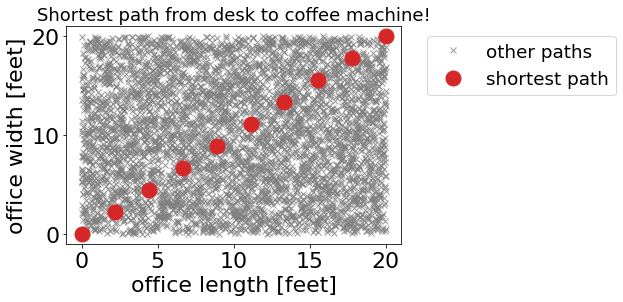

In [11]:
# Change title make it clearer to understand - here changing fontsize of title only
plt.figure()
plt.title("Shortest path from desk to coffee machine!", fontsize=18)

# Change marker and marker size for important points and plot them last (overlap of data)
plt.plot(x2, y2_rand,'x', color='tab:grey', alpha=0.8, label='other paths')
plt.plot(x1, y1,'o', color='tab:red', markersize=15, label='shortest path')


# Label the x and y axis
plt.xlabel('office length [feet]')
plt.ylabel('office width [feet]')

# Add a legend and place it out the box
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')


### 1.2 Many plots in 2D

What if we wanted to compare our initial version and current version next to each other? How can we create more than one plot in matplotlib?

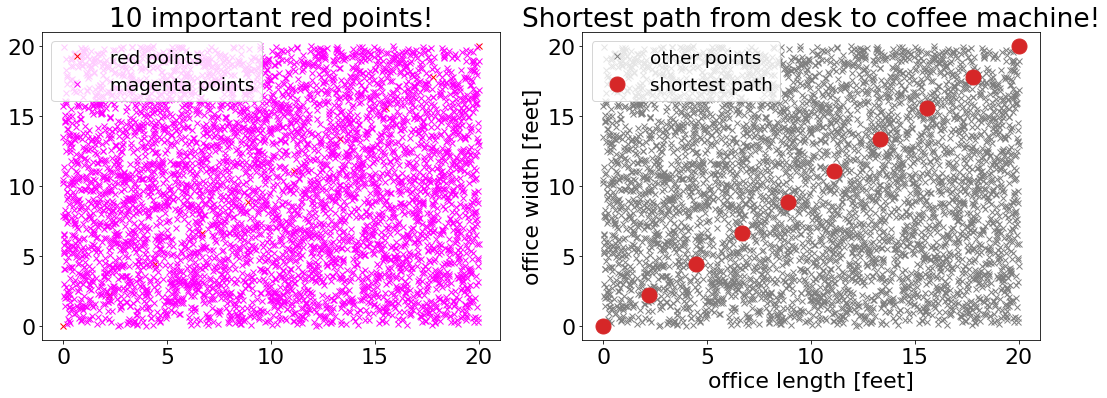

In [12]:
# Create a figure object of size wxh 15x6
fig = plt.figure(figsize=(15,6))
# Define one row and two columns
ax = fig.subplots(nrows=1,ncols=2)

# Define what we will plot in the first plot on the left hand size (index 0)
ax[0].set_title("10 important red points!")
ax[0].plot(x1, y1,'xr',label='red points')
ax[0].plot(x2, y2_rand,'x', color='magenta', label='magenta points')
ax[0].legend(loc='upper left', fontsize='small')

# Define what we will plot in the second plot starting on the left hand size (index 1)
ax[1].set_title("Shortest path from desk to coffee machine!")
ax[1].plot(x2, y2_rand,'x', color='tab:grey', label='other points')
ax[1].plot(x1, y1,'o', color='tab:red', markersize=15, label='shortest path')
ax[1].set_xlabel('office length [feet]')
ax[1].set_ylabel('office width [feet]')
ax[1].legend(loc='upper left', fontsize='small')
#ax[1].set_xlim([0,10])
# Make sure there is space for each plot

fig.tight_layout()


Note that we have the same interval on the x and y axis for each plot - that helps to make a reasonable comparison. You can use <code>ax[0].set_xlim([xmin,xmax])</code> to set a range, same for the y axis

### Exercise 1 (in class) - beyond a line plot ... how about a histogram?

Let's see where SV is in the room respect to the office length by using a histogram. Use the <code>plt.hist()</code> [function](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html) to visualize the <code> y2_rand </code> positions :
* test the number of bins using <code> bins= </code>
* change the color of your plot
* add an xlabel and a ylabel
* put your plot in the chat

Ok now you made a beautiful plot, how do you save it? You can use the <code>savefig()</code> function

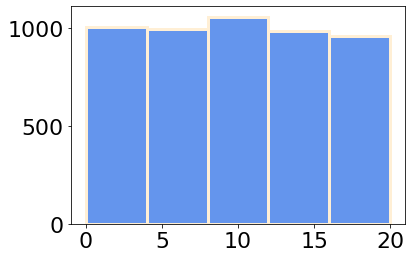

In [13]:
plt.figure()
plt.hist(y2_rand, bins=5, color='cornflowerblue', edgecolor="papayawhip", width=4, linewidth=3)
plt.savefig("my_DSMS_plot.png",transparent=True, dpi=300, bbox_inches='tight')

### 1.3 Plot data in 3D

In [14]:
def earth(theta, phi):
    a = 6378.137
    b = 6356.752
    c = 6371.000
    x = a*np.sin(theta)*np.cos(phi)
    y = b*np.sin(theta)*np.sin(phi)
    z = c*np.cos(theta)
    return x, y, z

In [17]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


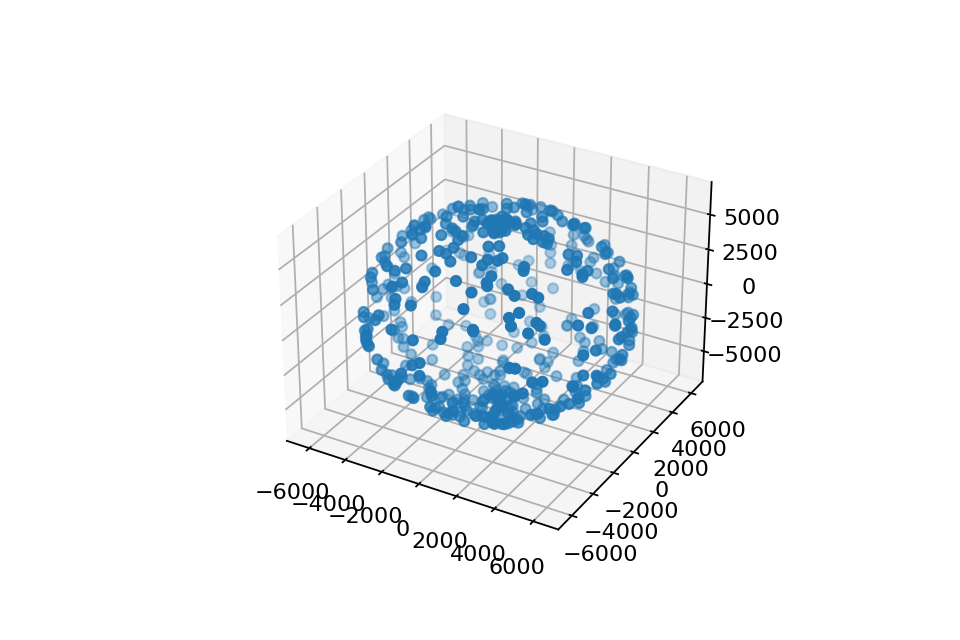

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
theta = np.array([ random.random() * np.pi for i in range(500) ])
phi = np.array([ random.random() * 2 * np.pi for i in range(500) ])
x, y, z = earth(theta, phi)
ax.scatter(x, y, z)

<IPython.core.display.Javascript object>


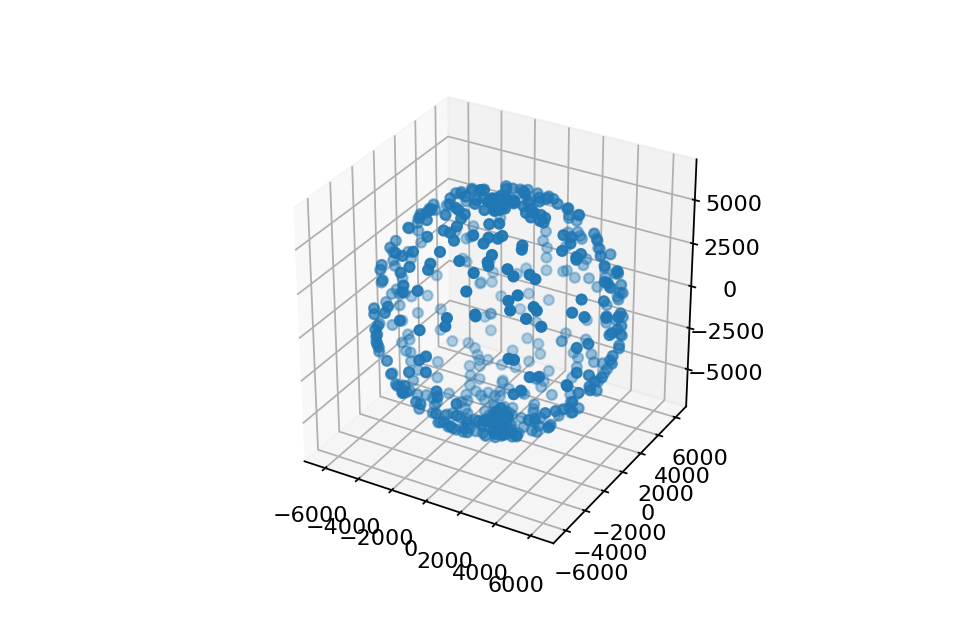

In [19]:
fig= plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect((np.ptp(x), np.ptp(y), np.ptp(z)))
ax.scatter(x, y, z)

<IPython.core.display.Javascript object>


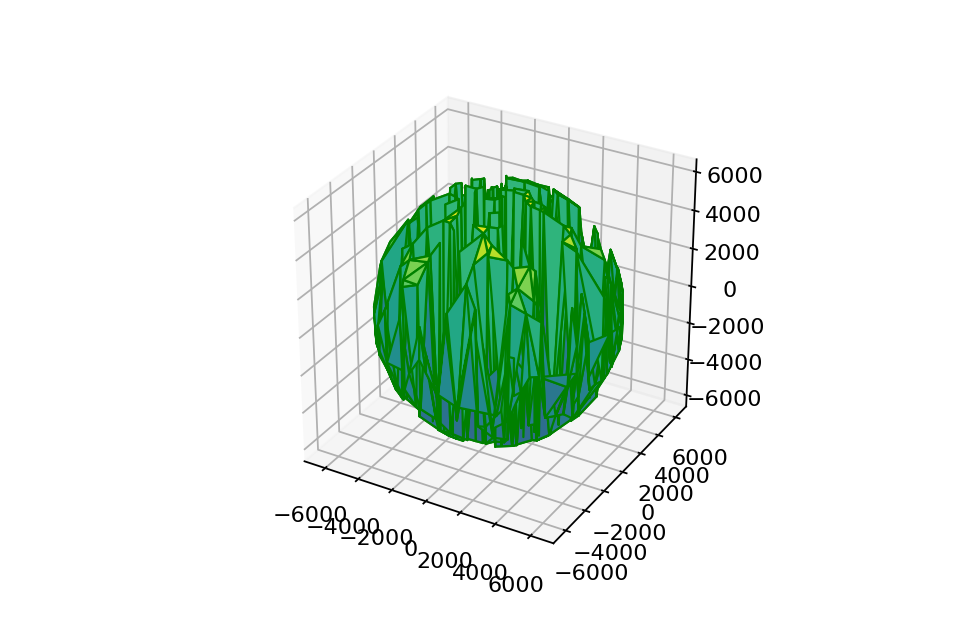

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect((np.ptp(x), np.ptp(y), np.ptp(z)))
ax.plot_trisurf(x, y, z, cmap ='viridis', edgecolor ='green')

<IPython.core.display.Javascript object>


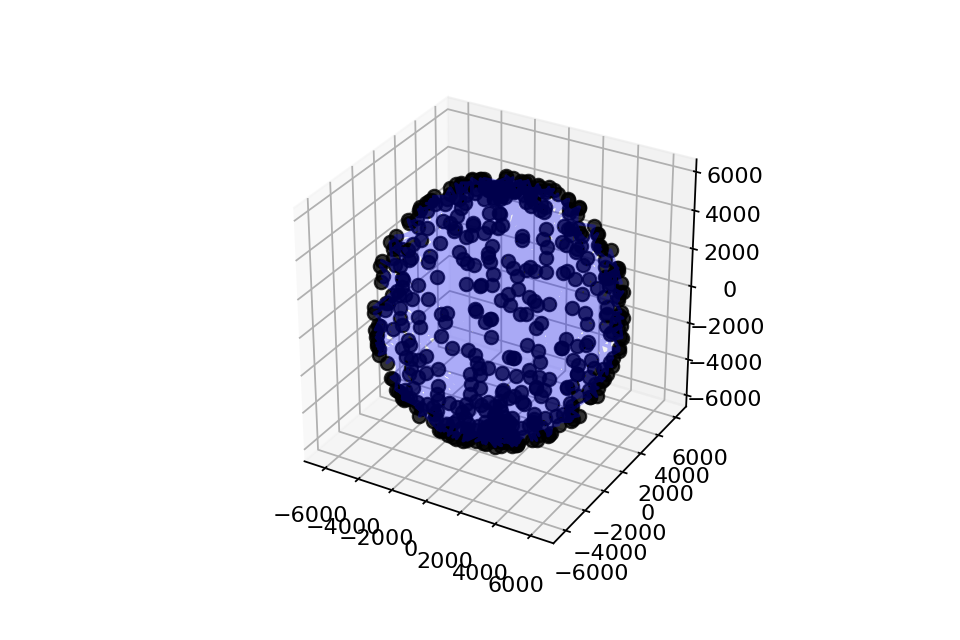

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect((np.ptp(x), np.ptp(y), np.ptp(z)))
#ax.plot3D(x,y,z)
ax.plot3D(x, y, z, 'ko', alpha=0.8)
ax.plot3D(x, y, z, 'b', alpha=0.3)

## 2. Pandas

Pandas relies on matplotlib to enable users to make plots using the <code>plot()</code> function (more info [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)). We are going to use a data set from kaggle which contains data on [world happiness](https://www.kaggle.com/unsdsn/world-happiness).

In [ ]:
import matplotlib
%matplotlib inline
matplotlib.rcParams.update({'font.size': 22})

Specify the correct path for these two files!

In [ ]:
df1 = pd.read_csv('datasets/2015.csv')
df2 = pd.read_csv('datasets/2017.csv')

In [ ]:
df1.head()

In [ ]:
df1.tail()

In [ ]:
df2.describe()

### 2.1 Line plot
If we want to make a **line plot** of each column we cant type

In [ ]:
df1.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

Note that we do not have an x and y label set. To do that, as we did before we would add the following code.

In [ ]:
df1.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.xlabel('data point')
plt.ylabel('column feature value')

In [ ]:
df1.plot(marker='x',linestyle='')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.xlabel('data point')
plt.ylabel('column feature value')

### 2.2 Scatter plot

If we want to make a scatter plot we can use the <code>plot.scatter()</code> function

In [ ]:
df1.plot.scatter(x='Happiness Score', y='Family', marker='>')


In [ ]:
df1.plot.scatter(x='Happiness Score', y='Family', c="Generosity", s=50);

In [ ]:
df1.plot.scatter(x='Happiness Score', y='Family',  s=df1["Family"] * 200, alpha=0.4);

### 2.3 Histograms

We can also plot **histograms**

In [ ]:
df1.plot.hist(alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

In [ ]:
df1['Happiness Score'].plot.hist(alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

### Exercise 1 (in class) breakout rooms - 15 min

Create 4 plots using the <code>subplot()</code> option, 2 plots per row
* Plot a scatter plot of two features (columns) for df1 (2015 data) and df2 (2019 data) in the top two plots
* Plot a histogram of one features (column) for df1 (2015 data) and df2 (2019 data) in the bottom two plots
* Add labels to each plot to indicate the year in which the data was collected

## Seaborn


Seaborn is a Python data visualization library based on matplotlib - [for more info](https://seaborn.pydata.org/). 

In [ ]:
import seaborn as sns
sns.set()
# Make sure that you have the most recent version of seaborn!

In [ ]:
sns.histplot(data=df1, x="Happiness Score", color='cornflowerblue')

In [ ]:
sns.kdeplot(data=df1, x="Happiness Score")

In [ ]:
sns.pairplot(data=df1)

### Exercise 2 (in class) - Breakout rooms (10 min)


It looks like there may be some correlations between the columns, we can look at these visually using the seaborn <code>heatmap()</code> plotting [function](https://seaborn.pydata.org/examples/many_pairwise_correlations.html).

Have a look at that webpage and create a correlation plot of the various columns in the dataframe.